Processing image file: images/titanic3.jpg
No emotions detected in images/titanic3.jpg
Processing image file: images/titanic2.jpg


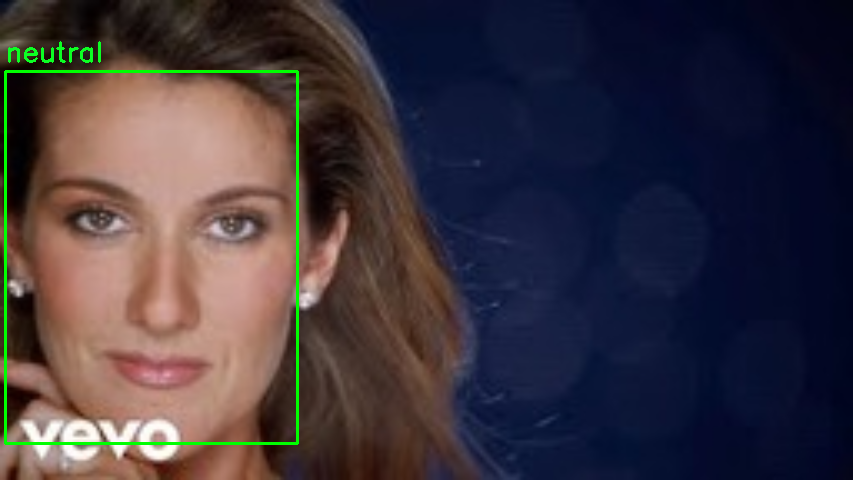

Dominant emotion in images/titanic2.jpg: neutral
Processing image file: images/titanic.jpg


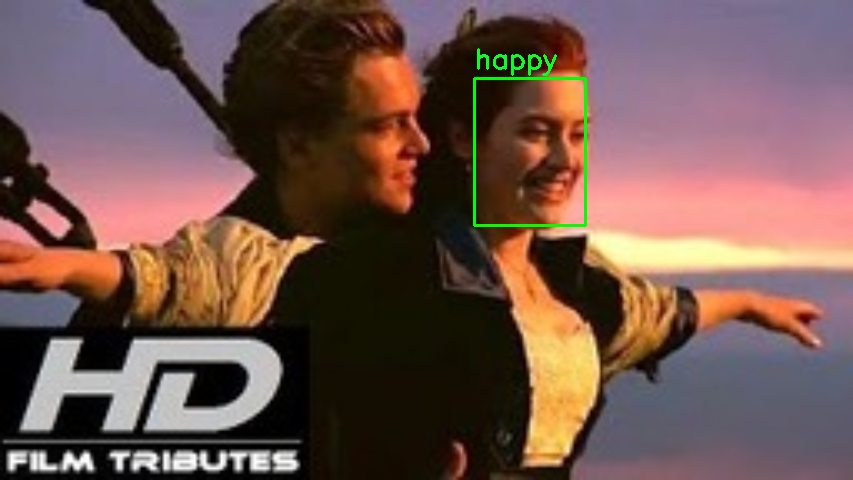

Dominant emotion in images/titanic.jpg: happy
Processed 2 images.
Predominant emotion: neutral
Average emotions:
angry: 0.04
disgust: 0.00
fear: 0.00
happy: 0.51
sad: 0.01
surprise: 0.00
neutral: 0.43


In [2]:
import cv2
from fer import FER
import os
from collections import Counter
from IPython.display import display, Image
import PIL.Image
import io

# Initialize FER emotion detector
emotion_detector = FER(mtcnn=True)

def analyze_images_emotions(image_paths):
    emotion_sums = {
        'angry': 0,
        'disgust': 0,
        'fear': 0,
        'happy': 0,
        'sad': 0,
        'surprise': 0,
        'neutral': 0
    }
    all_emotions = []
    frame_count = 0

    for image_path in image_paths:
        print(f"Processing image file: {image_path}")
        image = cv2.imread(image_path)

        if image is None:
            print(f"Error: Unable to open image file {image_path}.")
            continue

        # Resize the image to a consistent size for analysis
        # Keeping the aspect ratio can be important, but you may decide on a standard size
        height, width = image.shape[:2]
        aspect_ratio = width / height
        new_height = 480
        new_width = int(new_height * aspect_ratio)
        image_resized = cv2.resize(image, (new_width, new_height))

        # Analyze the emotions in the image
        emotions = emotion_detector.detect_emotions(image_resized)
        if emotions:
            dominant_emotion = max(emotions[0]['emotions'], key=emotions[0]['emotions'].get)
            all_emotions.append(dominant_emotion)
            for emotion, score in emotions[0]['emotions'].items():
                emotion_sums[emotion] += score
            frame_count += 1

            # Annotate the image with the detected emotions
            (x, y, w, h) = emotions[0]["box"]
            cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image_resized, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

            # Convert the image to RGB (from BGR) for display in Jupyter
            image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

            # Convert the image to a format that can be displayed in Jupyter
            pil_img = PIL.Image.fromarray(image_rgb)
            buffer = io.BytesIO()
            pil_img.save(buffer, format='PNG')
            display(Image(data=buffer.getvalue()))

            # Print the detected emotion
            print(f"Dominant emotion in {image_path}: {dominant_emotion}")
        else:
            print(f"No emotions detected in {image_path}")

    if frame_count == 0:
        print("No images were processed.")
        return None, None

    # Calculate average emotions
    average_emotions = {emotion: score / frame_count for emotion, score in emotion_sums.items()}

    # Determine the predominant emotion
    emotion_counts = Counter(all_emotions)
    predominant_emotion = emotion_counts.most_common(1)[0][0] if all_emotions else None

    print(f"Processed {frame_count} images.")
    return predominant_emotion, average_emotions

# List of image file paths
image_folder_path = 'images'
image_paths = [os.path.join(image_folder_path, img) for img in os.listdir(image_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif','.avif'))]

# Analyze the images
result = analyze_images_emotions(image_paths)

if result:
    predominant_emotion, average_emotions = result
    if predominant_emotion:
        print(f"Predominant emotion: {predominant_emotion}")
    else:
        print("No predominant emotion detected.")
    if average_emotions:
        print("Average emotions:")
        for emotion, score in average_emotions.items():
            print(f"{emotion}: {score:.2f}")
else:
    print("No images were processed.")


Processing image file: images/titanic3.jpg
No emotions detected in images/titanic3.jpg.
Processing image file: images/titanic2.jpg


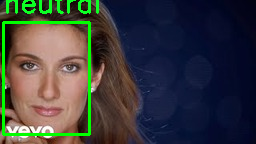

Dominant emotion in images/titanic2.jpg: neutral
Processing image file: images/titanic.jpg


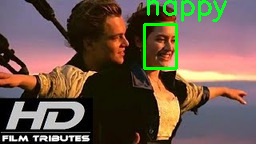

Dominant emotion in images/titanic.jpg: happy
Processed 2 images with detectable emotions.
Predominant emotion: neutral
Average emotions:
angry: 0.03
disgust: 0.00
fear: 0.00
happy: 0.61
sad: 0.01
surprise: 0.00
neutral: 0.35


In [3]:
import cv2
from fer import FER
import os
from collections import Counter
from IPython.display import display, Image
import PIL.Image
import io

# Initialize FER emotion detector
emotion_detector = FER(mtcnn=True)

def analyze_images_emotions(image_paths):
    emotion_sums = {
        'angry': 0,
        'disgust': 0,
        'fear': 0,
        'happy': 0,
        'sad': 0,
        'surprise': 0,
        'neutral': 0
    }
    all_emotions = []
    frame_count = 0

    for image_path in image_paths:
        print(f"Processing image file: {image_path}")
        image = cv2.imread(image_path)

        if image is None:
            print(f"Error: Unable to open image file {image_path}.")
            continue

        # Check if the image size is 256x144
        height, width = image.shape[:2]
        if width != 256 or height != 144:
            print(f"Skipping {image_path}: Image size is not 256x144.")
            continue

        # Analyze the emotions in the image
        emotions = emotion_detector.detect_emotions(image)
        if emotions:
            dominant_emotion = max(emotions[0]['emotions'], key=emotions[0]['emotions'].get)
            all_emotions.append(dominant_emotion)
            for emotion, score in emotions[0]['emotions'].items():
                emotion_sums[emotion] += score
            frame_count += 1

            # Annotate the image with the detected emotions
            (x, y, w, h) = emotions[0]["box"]
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

            # Convert the image to RGB (from BGR) for display in Jupyter
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Convert the image to a format that can be displayed in Jupyter
            pil_img = PIL.Image.fromarray(image_rgb)
            buffer = io.BytesIO()
            pil_img.save(buffer, format='PNG')
            display(Image(data=buffer.getvalue()))

            # Print the detected emotion
            print(f"Dominant emotion in {image_path}: {dominant_emotion}")
        else:
            print(f"No emotions detected in {image_path}.")

    if frame_count == 0:
        print("No images with detectable emotions were processed.")
        return None, None

    # Calculate average emotions
    average_emotions = {emotion: score / frame_count for emotion, score in emotion_sums.items()}

    # Determine the predominant emotion
    emotion_counts = Counter(all_emotions)
    predominant_emotion = emotion_counts.most_common(1)[0][0] if all_emotions else None

    print(f"Processed {frame_count} images with detectable emotions.")
    return predominant_emotion, average_emotions

# List of image file paths
image_folder_path = 'images'
image_paths = [os.path.join(image_folder_path, img) for img in os.listdir(image_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif', '.avif'))]

# Analyze the images
result = analyze_images_emotions(image_paths)

if result:
    predominant_emotion, average_emotions = result
    if predominant_emotion:
        print(f"Predominant emotion: {predominant_emotion}")
    else:
        print("No predominant emotion detected.")
    if average_emotions:
        print("Average emotions:")
        for emotion, score in average_emotions.items():
            print(f"{emotion}: {score:.2f}")
else:
    print("No images with detectable emotions were processed.")


Processing image file: images/titanic3.jpg
No emotions detected in images/titanic3.jpg. Marking as 'no emotion'.
Processing image file: images/titanic2.jpg


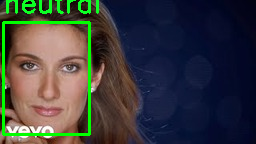

Dominant emotion in images/titanic2.jpg: neutral
Processing image file: images/titanic.jpg


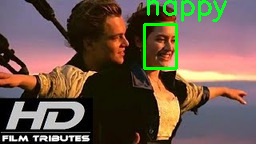

Dominant emotion in images/titanic.jpg: happy
Processed 2 images with detectable emotions.
{
    "processed_images": 2,
    "predominant_emotion": "neutral",
    "average_emotions": {
        "angry": 0.025,
        "disgust": 0.0,
        "fear": 0.0,
        "happy": 0.615,
        "sad": 0.01,
        "surprise": 0.0,
        "neutral": 0.35000000000000003
    },
    "results": [
        {
            "filename": "titanic3.jpg",
            "dominant_emotion": "no emotion",
            "emotions": {}
        },
        {
            "filename": "titanic2.jpg",
            "dominant_emotion": "neutral",
            "emotions": {
                "angry": 0.02,
                "disgust": 0.0,
                "fear": 0.0,
                "happy": 0.3,
                "sad": 0.01,
                "surprise": 0.0,
                "neutral": 0.67
            }
        },
        {
            "filename": "titanic.jpg",
            "dominant_emotion": "happy",
            "emotions": {
    

In [4]:
import cv2
from fer import FER
import os
from collections import Counter
from IPython.display import display, Image
import PIL.Image
import io
import json

# Initialize FER emotion detector
emotion_detector = FER(mtcnn=True)

def analyze_images_emotions(image_paths):
    results = []
    emotion_sums = {
        'angry': 0,
        'disgust': 0,
        'fear': 0,
        'happy': 0,
        'sad': 0,
        'surprise': 0,
        'neutral': 0
    }
    all_emotions = []
    frame_count = 0

    for image_path in image_paths:
        print(f"Processing image file: {image_path}")
        image = cv2.imread(image_path)

        if image is None:
            print(f"Error: Unable to open image file {image_path}.")
            continue

        # Check if the image size is 256x144
        height, width = image.shape[:2]
        if width != 256 or height != 144:
            print(f"Skipping {image_path}: Image size is not 256x144.")
            continue

        # Analyze the emotions in the image
        emotions = emotion_detector.detect_emotions(image)
        if emotions:
            dominant_emotion = max(emotions[0]['emotions'], key=emotions[0]['emotions'].get)
            all_emotions.append(dominant_emotion)
            for emotion, score in emotions[0]['emotions'].items():
                emotion_sums[emotion] += score
            frame_count += 1

            # Collect results for JSON output
            result = {
                'filename': os.path.basename(image_path),
                'dominant_emotion': dominant_emotion,
                'emotions': emotions[0]['emotions']
            }

            # Annotate the image with the detected emotions
            (x, y, w, h) = emotions[0]["box"]
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

            # Convert the image to RGB (from BGR) for display in Jupyter
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Convert the image to a format that can be displayed in Jupyter
            pil_img = PIL.Image.fromarray(image_rgb)
            buffer = io.BytesIO()
            pil_img.save(buffer, format='PNG')
            display(Image(data=buffer.getvalue()))

            # Print the detected emotion
            print(f"Dominant emotion in {image_path}: {dominant_emotion}")
        else:
            result = {
                'filename': os.path.basename(image_path),
                'dominant_emotion': 'no emotion',
                'emotions': {}
            }
            print(f"No emotions detected in {image_path}. Marking as 'no emotion'.")

        results.append(result)

    if frame_count == 0:
        print("No images with detectable emotions were processed.")

    # Calculate average emotions if any were detected
    average_emotions = {emotion: (score / frame_count if frame_count > 0 else 0) for emotion, score in emotion_sums.items()}

    # Determine the predominant emotion
    emotion_counts = Counter(all_emotions)
    predominant_emotion = emotion_counts.most_common(1)[0][0] if all_emotions else 'no emotion'

    print(f"Processed {frame_count} images with detectable emotions.")
    
    # Prepare JSON output
    output = {
        'processed_images': frame_count,
        'predominant_emotion': predominant_emotion,
        'average_emotions': average_emotions,
        'results': results
    }
    
    return output

# List of image file paths
image_folder_path = 'images'
image_paths = [os.path.join(image_folder_path, img) for img in os.listdir(image_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif', '.avif'))]

# Analyze the images
output_json = analyze_images_emotions(image_paths)

# Print JSON output
if output_json:
    print(json.dumps(output_json, indent=4))
else:
    print("No images with detectable emotions were processed.")


Processing image file: images/titanic3.jpg
No emotions detected in images/titanic3.jpg. Marking as 'no emotion'.
Processing image file: images/titanic2.jpg


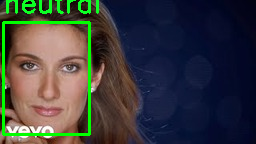

Dominant emotion in images/titanic2.jpg: neutral
Processing image file: images/titanic.jpg


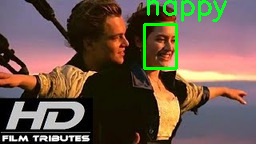

Dominant emotion in images/titanic.jpg: happy
Processed 2 images with detectable emotions.
{
    "processed_images": 2,
    "predominant_emotion": "neutral",
    "average_emotions": {
        "angry": 0.025,
        "disgust": 0.0,
        "fear": 0.0,
        "happy": 0.615,
        "sad": 0.01,
        "surprise": 0.0,
        "neutral": 0.35000000000000003
    },
    "results": [
        {
            "filename": "titanic3.jpg",
            "dominant_emotion": "no emotion"
        },
        {
            "filename": "titanic2.jpg",
            "dominant_emotion": "neutral"
        },
        {
            "filename": "titanic.jpg",
            "dominant_emotion": "happy"
        }
    ]
}


In [5]:
import cv2
from fer import FER
import os
from collections import Counter
from IPython.display import display, Image
import PIL.Image
import io
import json

# Initialize FER emotion detector
emotion_detector = FER(mtcnn=True)

def analyze_images_emotions(image_paths):
    results = []
    emotion_sums = {
        'angry': 0,
        'disgust': 0,
        'fear': 0,
        'happy': 0,
        'sad': 0,
        'surprise': 0,
        'neutral': 0
    }
    all_emotions = []
    frame_count = 0

    for image_path in image_paths:
        print(f"Processing image file: {image_path}")
        image = cv2.imread(image_path)

        if image is None:
            print(f"Error: Unable to open image file {image_path}.")
            continue

        # Check if the image size is 256x144
        height, width = image.shape[:2]
        if width != 256 or height != 144:
            print(f"Skipping {image_path}: Image size is not 256x144.")
            continue

        # Analyze the emotions in the image
        emotions = emotion_detector.detect_emotions(image)
        if emotions:
            dominant_emotion = max(emotions[0]['emotions'], key=emotions[0]['emotions'].get)
            all_emotions.append(dominant_emotion)
            for emotion, score in emotions[0]['emotions'].items():
                emotion_sums[emotion] += score
            frame_count += 1

            # Collect results for JSON output
            result = {
                'filename': os.path.basename(image_path),
                'dominant_emotion': dominant_emotion
            }

            # Annotate the image with the detected emotions
            (x, y, w, h) = emotions[0]["box"]
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

            # Convert the image to RGB (from BGR) for display in Jupyter
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Convert the image to a format that can be displayed in Jupyter
            pil_img = PIL.Image.fromarray(image_rgb)
            buffer = io.BytesIO()
            pil_img.save(buffer, format='PNG')
            display(Image(data=buffer.getvalue()))

            # Print the detected emotion
            print(f"Dominant emotion in {image_path}: {dominant_emotion}")
        else:
            result = {
                'filename': os.path.basename(image_path),
                'dominant_emotion': 'no emotion'
            }
            print(f"No emotions detected in {image_path}. Marking as 'no emotion'.")

        results.append(result)

    if frame_count == 0:
        print("No images with detectable emotions were processed.")

    # Calculate average emotions if any were detected
    average_emotions = {emotion: (score / frame_count if frame_count > 0 else 0) for emotion, score in emotion_sums.items()}

    # Determine the predominant emotion
    emotion_counts = Counter(all_emotions)
    predominant_emotion = emotion_counts.most_common(1)[0][0] if all_emotions else 'no emotion'

    print(f"Processed {frame_count} images with detectable emotions.")
    
    # Prepare JSON output
    output = {
        'processed_images': frame_count,
        'predominant_emotion': predominant_emotion,
        'average_emotions': average_emotions,
        'results': results
    }
    
    return output

# List of image file paths
image_folder_path = 'images'
image_paths = [os.path.join(image_folder_path, img) for img in os.listdir(image_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif', '.avif'))]

# Analyze the images
output_json = analyze_images_emotions(image_paths)

# Print JSON output
if output_json:
    print(json.dumps(output_json, indent=4))
else:
    print("No images with detectable emotions were processed.")


In [6]:
import cv2
from fer import FER
import requests
import numpy as np
from collections import Counter
from IPython.display import display, Image
import PIL.Image
import io
import json

# Initialize FER emotion detector
emotion_detector = FER(mtcnn=True)

def download_image(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        return image
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image from {url}: {e}")
        return None

def analyze_images_emotions(image_data):
    results = []
    emotion_sums = {
        'angry': 0,
        'disgust': 0,
        'fear': 0,
        'happy': 0,
        'sad': 0,
        'surprise': 0,
        'neutral': 0
    }
    all_emotions = []
    frame_count = 0

    for item in image_data:
        image_url = item.get('image_list')
        if not image_url:
            print("No image URL found.")
            continue

        print(f"Processing image from URL: {image_url}")
        image = download_image(image_url)

        if image is None:
            print(f"Error: Unable to download or open image from {image_url}.")
            continue

        # Check if the image size is 256x144
        height, width = image.shape[:2]
        if width != 256 or height != 144:
            print(f"Skipping image from {image_url}: Image size is not 256x144.")
            continue

        # Analyze the emotions in the image
        emotions = emotion_detector.detect_emotions(image)
        if emotions:
            dominant_emotion = max(emotions[0]['emotions'], key=emotions[0]['emotions'].get)
            all_emotions.append(dominant_emotion)
            for emotion, score in emotions[0]['emotions'].items():
                emotion_sums[emotion] += score
            frame_count += 1

            # Collect results for JSON output
            item['dominant_emotion'] = dominant_emotion

            # Annotate the image with the detected emotions
            (x, y, w, h) = emotions[0]["box"]
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

            # Convert the image to RGB (from BGR) for display in Jupyter
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Convert the image to a format that can be displayed in Jupyter
            pil_img = PIL.Image.fromarray(image_rgb)
            buffer = io.BytesIO()
            pil_img.save(buffer, format='PNG')
            display(Image(data=buffer.getvalue()))

            # Print the detected emotion
            print(f"Dominant emotion in image from {image_url}: {dominant_emotion}")
        else:
            item['dominant_emotion'] = 'no emotion'
            print(f"No emotions detected in image from {image_url}. Marking as 'no emotion'.")

        results.append(item)

    if frame_count == 0:
        print("No images with detectable emotions were processed.")

    # Calculate average emotions if any were detected
    average_emotions = {emotion: (score / frame_count if frame_count > 0 else 0) for emotion, score in emotion_sums.items()}

    # Determine the predominant emotion
    emotion_counts = Counter(all_emotions)
    predominant_emotion = emotion_counts.most_common(1)[0][0] if all_emotions else 'no emotion'

    print(f"Processed {frame_count} images with detectable emotions.")
    
    # Prepare JSON output
    output = {
        'processed_images': frame_count,
        'predominant_emotion': predominant_emotion,
        'average_emotions': average_emotions,
        'results': results
    }
    
    return output

# Example image data
image_data = [
    {
        "image_list": "https://media.cnn.com/api/v1/images/stellar/prod/230213144330-02-titanic-25th-anniversary-restricted.jpg?c=original",
        "time": "00:12:34",
        "posd": "6.77",
        "Live": False
    }
]

# Analyze the images
output_json = analyze_images_emotions(image_data)

# Print JSON output
if output_json:
    print(json.dumps(output_json, indent=4))
else:
    print("No images with detectable emotions were processed.")


Processing image from URL: https://media.cnn.com/api/v1/images/stellar/prod/230213144330-02-titanic-25th-anniversary-restricted.jpg?c=original
Skipping image from https://media.cnn.com/api/v1/images/stellar/prod/230213144330-02-titanic-25th-anniversary-restricted.jpg?c=original: Image size is not 256x144.
No images with detectable emotions were processed.
Processed 0 images with detectable emotions.
{
    "processed_images": 0,
    "predominant_emotion": "no emotion",
    "average_emotions": {
        "angry": 0,
        "disgust": 0,
        "fear": 0,
        "happy": 0,
        "sad": 0,
        "surprise": 0,
        "neutral": 0
    },
    "results": []
}


In [7]:
import cv2
from fer import FER
import requests
import numpy as np
from collections import Counter
from IPython.display import display, Image
import PIL.Image
import io
import json

# Initialize FER emotion detector
emotion_detector = FER(mtcnn=True)

def download_image(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        return image
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image from {url}: {e}")
        return None

def analyze_images_emotions(image_data):
    results = []
    emotion_sums = {
        'angry': 0,
        'disgust': 0,
        'fear': 0,
        'happy': 0,
        'sad': 0,
        'surprise': 0,
        'neutral': 0
    }
    all_emotions = []
    frame_count = 0

    for item in image_data:
        image_url = item.get('image_list')
        if not image_url:
            print("No image URL found.")
            continue

        print(f"Processing image from URL: {image_url}")
        image = download_image(image_url)

        if image is None:
            print(f"Error: Unable to download or open image from {image_url}.")
            continue

        # Analyze the emotions in the image
        emotions = emotion_detector.detect_emotions(image)
        if emotions:
            dominant_emotion = max(emotions[0]['emotions'], key=emotions[0]['emotions'].get)
            all_emotions.append(dominant_emotion)
            for emotion, score in emotions[0]['emotions'].items():
                emotion_sums[emotion] += score
            frame_count += 1

            # Collect results for JSON output
            item['dominant_emotion'] = dominant_emotion

            # Annotate the image with the detected emotions
            (x, y, w, h) = emotions[0]["box"]
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

            # Convert the image to RGB (from BGR) for display in Jupyter
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Convert the image to a format that can be displayed in Jupyter
            pil_img = PIL.Image.fromarray(image_rgb)
            buffer = io.BytesIO()
            pil_img.save(buffer, format='PNG')
            display(Image(data=buffer.getvalue()))

            # Print the detected emotion
            print(f"Dominant emotion in image from {image_url}: {dominant_emotion}")
        else:
            item['dominant_emotion'] = 'no emotion'
            print(f"No emotions detected in image from {image_url}. Marking as 'no emotion'.")

        results.append(item)

    if frame_count == 0:
        print("No images with detectable emotions were processed.")

    # Calculate average emotions if any were detected
    average_emotions = {emotion: (score / frame_count if frame_count > 0 else 0) for emotion, score in emotion_sums.items()}

    # Determine the predominant emotion
    emotion_counts = Counter(all_emotions)
    predominant_emotion = emotion_counts.most_common(1)[0][0] if all_emotions else 'no emotion'

    print(f"Processed {frame_count} images with detectable emotions.")
    
    # Prepare JSON output
    output = {
        'processed_images': frame_count,
        'predominant_emotion': predominant_emotion,
        'average_emotions': average_emotions,
        'results': results
    }
    
    return output

# Example image data
image_data = [
    {
        "image_list": "https://media.cnn.com/api/v1/images/stellar/prod/230213144330-02-titanic-25th-anniversary-restricted.jpg?c=original",
        "time": "00:12:34",
        "posd": "6.77",
        "Live": False
    }
]

# Analyze the images
output_json = analyze_images_emotions(image_data)

# Print JSON output
if output_json:
    print(json.dumps(output_json, indent=4))
else:
    print("No images with detectable emotions were processed.")


Processing image from URL: https://media.cnn.com/api/v1/images/stellar/prod/230213144330-02-titanic-25th-anniversary-restricted.jpg?c=original
No emotions detected in image from https://media.cnn.com/api/v1/images/stellar/prod/230213144330-02-titanic-25th-anniversary-restricted.jpg?c=original. Marking as 'no emotion'.
No images with detectable emotions were processed.
Processed 0 images with detectable emotions.
{
    "processed_images": 0,
    "predominant_emotion": "no emotion",
    "average_emotions": {
        "angry": 0,
        "disgust": 0,
        "fear": 0,
        "happy": 0,
        "sad": 0,
        "surprise": 0,
        "neutral": 0
    },
    "results": [
        {
            "image_list": "https://media.cnn.com/api/v1/images/stellar/prod/230213144330-02-titanic-25th-anniversary-restricted.jpg?c=original",
            "time": "00:12:34",
            "posd": "6.77",
            "Live": false,
            "dominant_emotion": "no emotion"
        }
    ]
}


In [8]:
import cv2
from fer import FER
import requests
import numpy as np
from IPython.display import display, Image
import PIL.Image
import io
import json

# Initialize FER emotion detector
emotion_detector = FER(mtcnn=True)

def download_image(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        return image
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image from {url}: {e}")
        return None

def analyze_images_emotions(image_data):
    results = []
    emotion_sums = {
        'angry': 0,
        'disgust': 0,
        'fear': 0,
        'happy': 0,
        'sad': 0,
        'surprise': 0,
        'neutral': 0
    }
    all_emotions = []
    frame_count = 0

    for item in image_data:
        image_url = item.get('image_list')
        if not image_url:
            print("No image URL found.")
            continue

        print(f"Processing image from URL: {image_url}")
        image = download_image(image_url)

        if image is None:
            print(f"Error: Unable to download or open image from {image_url}.")
            continue

        # Analyze the emotions in the image
        emotions = emotion_detector.detect_emotions(image)
        if emotions:
            dominant_emotion = max(emotions[0]['emotions'], key=emotions[0]['emotions'].get)
            all_emotions.append(dominant_emotion)
            for emotion, score in emotions[0]['emotions'].items():
                emotion_sums[emotion] += score
            frame_count += 1

            # Collect results for JSON output
            item['dominant_emotion'] = dominant_emotion

            # Annotate the image with the detected emotions
            for emotion_info in emotions:
                (x, y, w, h) = emotion_info["box"]
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(image, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

            # Convert the image to RGB (from BGR) for display in Jupyter
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Convert the image to a format that can be displayed in Jupyter
            pil_img = PIL.Image.fromarray(image_rgb)
            buffer = io.BytesIO()
            pil_img.save(buffer, format='PNG')
            display(Image(data=buffer.getvalue()))

            # Print the detected emotion
            print(f"Dominant emotion in image from {image_url}: {dominant_emotion}")
        else:
            item['dominant_emotion'] = 'no emotion'
            print(f"No emotions detected in image from {image_url}. Marking as 'no emotion'.")

        results.append(item)

    if frame_count == 0:
        print("No images with detectable emotions were processed.")

    # Calculate average emotions if any were detected
    average_emotions = {emotion: (score / frame_count if frame_count > 0 else 0) for emotion, score in emotion_sums.items()}

    # Determine the predominant emotion
    emotion_counts = Counter(all_emotions)
    predominant_emotion = emotion_counts.most_common(1)[0][0] if all_emotions else 'no emotion'

    print(f"Processed {frame_count} images with detectable emotions.")
    
    # Prepare JSON output
    output = {
        'processed_images': frame_count,
        'predominant_emotion': predominant_emotion,
        'average_emotions': average_emotions,
        'results': results
    }
    
    return output

# Example image data
image_data = [
    {
        "image_list": "https://media.cnn.com/api/v1/images/stellar/prod/230213144330-02-titanic-25th-anniversary-restricted.jpg?c=original",
        "time": "00:12:34",
        "posd": "6.77",
        "Live": False
    }
]

# Analyze the images
output_json = analyze_images_emotions(image_data)

# Print JSON output
if output_json:
    print(json.dumps(output_json, indent=4))
else:
    print("No images with detectable emotions were processed.")


Processing image from URL: https://media.cnn.com/api/v1/images/stellar/prod/230213144330-02-titanic-25th-anniversary-restricted.jpg?c=original
No emotions detected in image from https://media.cnn.com/api/v1/images/stellar/prod/230213144330-02-titanic-25th-anniversary-restricted.jpg?c=original. Marking as 'no emotion'.
No images with detectable emotions were processed.
Processed 0 images with detectable emotions.
{
    "processed_images": 0,
    "predominant_emotion": "no emotion",
    "average_emotions": {
        "angry": 0,
        "disgust": 0,
        "fear": 0,
        "happy": 0,
        "sad": 0,
        "surprise": 0,
        "neutral": 0
    },
    "results": [
        {
            "image_list": "https://media.cnn.com/api/v1/images/stellar/prod/230213144330-02-titanic-25th-anniversary-restricted.jpg?c=original",
            "time": "00:12:34",
            "posd": "6.77",
            "Live": false,
            "dominant_emotion": "no emotion"
        }
    ]
}


Processing image from URL: https://media.cnn.com/api/v1/images/stellar/prod/230213144330-02-titanic-25th-anniversary-restricted.jpg?c=original
No emotions detected in image from https://media.cnn.com/api/v1/images/stellar/prod/230213144330-02-titanic-25th-anniversary-restricted.jpg?c=original. Marking as 'no emotion'.
Processing image from URL: https://variety.com/wp-content/uploads/2016/03/titanic-anniversary.jpg?w=1000&h=608&crop=1
No emotions detected in image from https://variety.com/wp-content/uploads/2016/03/titanic-anniversary.jpg?w=1000&h=608&crop=1. Marking as 'no emotion'.
Processing image from URL: https://goldenglobes.com/wp-content/uploads/2023/10/leo-2023.jpg?w=600?w=600


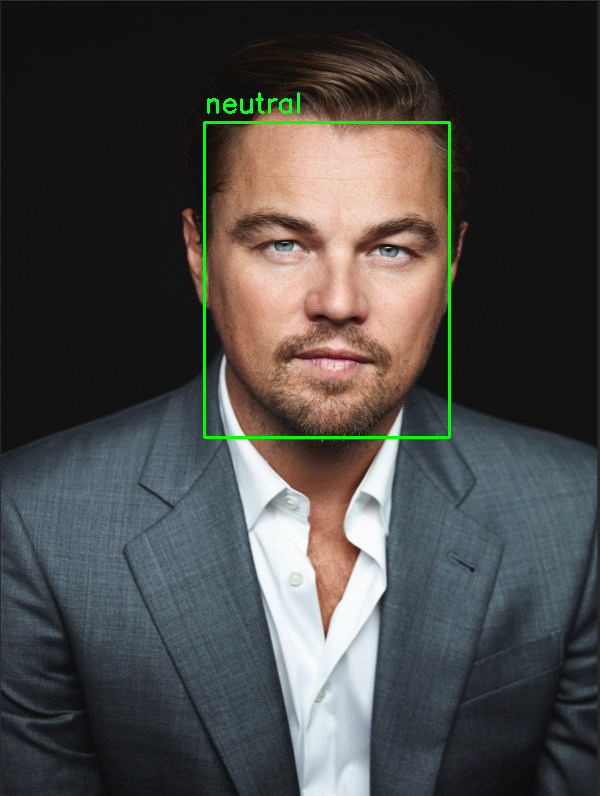

Dominant emotion in image from https://goldenglobes.com/wp-content/uploads/2023/10/leo-2023.jpg?w=600?w=600: neutral
Processing image from URL: https://upload.wikimedia.org/wikipedia/commons/2/26/Leonardo_DiCaprio_2014.jpg
Error downloading image from https://upload.wikimedia.org/wikipedia/commons/2/26/Leonardo_DiCaprio_2014.jpg: 403 Client Error: Forbidden. Please comply with the User-Agent policy: https://meta.wikimedia.org/wiki/User-Agent_policy for url: https://upload.wikimedia.org/wikipedia/commons/2/26/Leonardo_DiCaprio_2014.jpg
Error: Unable to download or open image from https://upload.wikimedia.org/wikipedia/commons/2/26/Leonardo_DiCaprio_2014.jpg.
Processed 1 images with detectable emotions.
{
    "processed_images": 1,
    "predominant_emotion": "neutral",
    "average_emotions": {
        "angry": 0.05,
        "disgust": 0.0,
        "fear": 0.01,
        "happy": 0.0,
        "sad": 0.07,
        "surprise": 0.0,
        "neutral": 0.87
    },
    "results": [
        {
 

In [17]:
import cv2
from fer import FER
import requests
import numpy as np
from collections import Counter
from IPython.display import display, Image
import PIL.Image
import io
import json

# Initialize FER emotion detector
emotion_detector = FER(mtcnn=True)

def download_image(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        return image
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image from {url}: {e}")
        return None

def analyze_images_emotions(image_data):
    results = []
    emotion_sums = {
        'angry': 0,
        'disgust': 0,
        'fear': 0,
        'happy': 0,
        'sad': 0,
        'surprise': 0,
        'neutral': 0
    }
    all_emotions = []
    frame_count = 0

    for item in image_data:
        image_url = item.get('image_list')
        if not image_url:
            print("No image URL found.")
            continue

        print(f"Processing image from URL: {image_url}")
        image = download_image(image_url)

        if image is None:
            print(f"Error: Unable to download or open image from {image_url}.")
            continue

        # Analyze the emotions in the image
        emotions = emotion_detector.detect_emotions(image)
        if emotions:
            dominant_emotion = max(emotions[0]['emotions'], key=emotions[0]['emotions'].get)
            all_emotions.append(dominant_emotion)
            for emotion, score in emotions[0]['emotions'].items():
                emotion_sums[emotion] += score
            frame_count += 1

            # Collect results for JSON output
            item['dominant_emotion'] = dominant_emotion

            # Annotate the image with the detected emotions
            for emotion_info in emotions:
                (x, y, w, h) = emotion_info["box"]
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(image, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

            # Convert the image to RGB (from BGR) for display in Jupyter
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Convert the image to a format that can be displayed in Jupyter
            pil_img = PIL.Image.fromarray(image_rgb)
            buffer = io.BytesIO()
            pil_img.save(buffer, format='PNG')
            display(Image(data=buffer.getvalue()))

            # Print the detected emotion
            print(f"Dominant emotion in image from {image_url}: {dominant_emotion}")
        else:
            item['dominant_emotion'] = 'no emotion'
            print(f"No emotions detected in image from {image_url}. Marking as 'no emotion'.")

        results.append(item)

    if frame_count == 0:
        print("No images with detectable emotions were processed.")

    # Calculate average emotions if any were detected
    average_emotions = {emotion: (score / frame_count if frame_count > 0 else 0) for emotion, score in emotion_sums.items()}

    # Determine the predominant emotion
    emotion_counts = Counter(all_emotions)
    predominant_emotion = emotion_counts.most_common(1)[0][0] if all_emotions else 'no emotion'

    print(f"Processed {frame_count} images with detectable emotions.")
    
    # Prepare JSON output
    output = {
        'processed_images': frame_count,
        'predominant_emotion': predominant_emotion,
        'average_emotions': average_emotions,
        'results': results
    }
    
    return output

# Load image data from JSON file
with open('image.json', 'r') as file:
    image_data = json.load(file)

# Analyze the images
output_json = analyze_images_emotions(image_data)

# Print JSON output
if output_json:
    print(json.dumps(output_json, indent=4))
else:
    print("No images with detectable emotions were processed.")
